In [1]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import models
from tqdm import tqdm

# Example directory and classes (adjust as per your dataset)
DataDirectory = "C:\\Users\\hrugv\\OneDrive\\Desktop\\emot"
Classes = ["0", "1", "2", "3", "4", "5", "6"]

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [2]:
# Custom Dataset class
class CustomDataset(Dataset):
    def __init__(self, data_dir, classes, transform=None):
        self.data_dir = data_dir
        self.classes = classes
        self.transform = transform
        self.training_data = self.create_training_data()

    def __len__(self):
        return len(self.training_data)

    def __getitem__(self, idx):
        img_name, label = self.training_data[idx]
        img_path = os.path.join(self.data_dir, self.classes[label], img_name)
        img = cv.imread(img_path)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        
        if self.transform:
            img = self.transform(img)

        return img, label

    def create_training_data(self):
        training_data = []
        for label, category in enumerate(self.classes):
            path = os.path.join(self.data_dir, category)
            for img_name in os.listdir(path):
                training_data.append((img_name, label))
        return training_data

# Define transformations
img_size = 224
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((img_size, img_size)),
    transforms.ToTensor(),
])


In [3]:
import torch.nn as nn
import torchvision.models as models

# Define model architecture
class Net(nn.Module):
    def __init__(self, num_classes=len(Classes)):
        super(Net, self).__init__()
        self.base_model = models.resnet18(pretrained=True)
        # Replace the classifier with your custom layers
        num_ftrs = self.base_model.fc.in_features
        self.base_model.fc = nn.Sequential(
            nn.Linear(num_ftrs, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        return self.base_model(x)

# Initialize the model
model = Net().to(device)


C:\Users\hrugv\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\hrugv\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [4]:
# Initialize custom dataset and dataloader
custom_dataset = CustomDataset(DataDirectory, Classes, transform=transform)
dataloader = DataLoader(custom_dataset, batch_size=32, shuffle=True)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Function to calculate accuracy
def calculate_accuracy(outputs, labels):
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == labels).sum().item()
    total = labels.size(0)
    accuracy = correct / total
    return accuracy

# Train the model
def train_model(model, dataloader, criterion, optimizer, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        running_accuracy = 0.0
        for inputs, labels in tqdm(dataloader, desc=f"Epoch {epoch+1}/{num_epochs}"):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            accuracy = calculate_accuracy(outputs, labels)
            running_accuracy += accuracy
        epoch_loss = running_loss / len(dataloader)
        epoch_accuracy = running_accuracy / len(dataloader)
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")

# Training the model
train_model(model, dataloader, criterion, optimizer, num_epochs=15)
torch.save(model.state_dict(), 'emodetection_model.pth')



Epoch 1/15: 100%|██████████| 1122/1122 [05:52<00:00,  3.18it/s]


Epoch [1/15], Loss: 1.2781, Accuracy: 0.5115


Epoch 2/15: 100%|██████████| 1122/1122 [04:09<00:00,  4.49it/s]


Epoch [2/15], Loss: 1.0858, Accuracy: 0.5892


Epoch 3/15: 100%|██████████| 1122/1122 [03:29<00:00,  5.36it/s]


Epoch [3/15], Loss: 0.9810, Accuracy: 0.6322


Epoch 4/15: 100%|██████████| 1122/1122 [03:23<00:00,  5.51it/s]


Epoch [4/15], Loss: 0.8850, Accuracy: 0.6722


Epoch 5/15: 100%|██████████| 1122/1122 [03:25<00:00,  5.47it/s]


Epoch [5/15], Loss: 0.7655, Accuracy: 0.7180


Epoch 6/15: 100%|██████████| 1122/1122 [03:27<00:00,  5.41it/s]


Epoch [6/15], Loss: 0.6324, Accuracy: 0.7678


Epoch 7/15: 100%|██████████| 1122/1122 [03:23<00:00,  5.51it/s]


Epoch [7/15], Loss: 0.4809, Accuracy: 0.8268


Epoch 8/15: 100%|██████████| 1122/1122 [03:23<00:00,  5.50it/s]


Epoch [8/15], Loss: 0.3533, Accuracy: 0.8778


Epoch 9/15: 100%|██████████| 1122/1122 [03:18<00:00,  5.64it/s]


Epoch [9/15], Loss: 0.2564, Accuracy: 0.9116


Epoch 10/15: 100%|██████████| 1122/1122 [03:17<00:00,  5.67it/s]


Epoch [10/15], Loss: 0.1957, Accuracy: 0.9343


Epoch 11/15: 100%|██████████| 1122/1122 [03:14<00:00,  5.77it/s]


Epoch [11/15], Loss: 0.1594, Accuracy: 0.9477


Epoch 12/15: 100%|██████████| 1122/1122 [03:15<00:00,  5.75it/s]


Epoch [12/15], Loss: 0.1352, Accuracy: 0.9552


Epoch 13/15: 100%|██████████| 1122/1122 [03:15<00:00,  5.75it/s]


Epoch [13/15], Loss: 0.1218, Accuracy: 0.9597


Epoch 14/15: 100%|██████████| 1122/1122 [03:15<00:00,  5.75it/s]


Epoch [14/15], Loss: 0.1079, Accuracy: 0.9643


Epoch 15/15: 100%|██████████| 1122/1122 [03:22<00:00,  5.53it/s]

Epoch [15/15], Loss: 0.1032, Accuracy: 0.9660


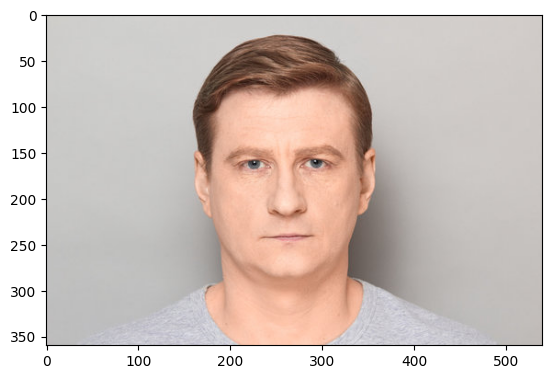

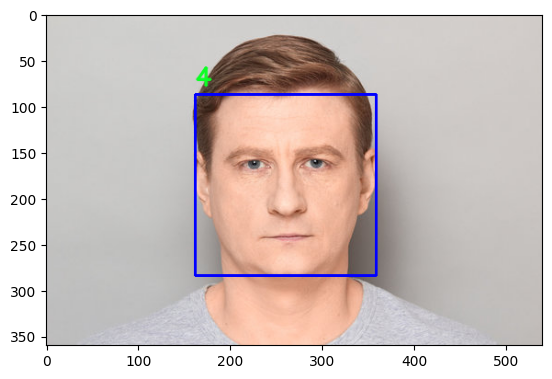

Predicted Class: 4


In [5]:
# Example path for testing an image
test_img_path = "C://Users//hrugv//OneDrive//Desktop//man4.jpg"

# Define transformations for testing
transform_test = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((img_size, img_size)),
    transforms.ToTensor(),
])

# Function to test the image
def test_image(model, img_path):
    frame = cv.imread(img_path)
    plt.imshow(cv.cvtColor(frame, cv.COLOR_BGR2RGB))
    plt.show()
    
    # Preprocess the face region
    face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    
    if len(faces) == 0:
        print("No face detected.")
        return
    
    x, y, w, h = faces[0]
    roi_color = frame[y:y+h, x:x+w]
    face_roi = cv.resize(roi_color, (img_size, img_size))
    face_roi = transform_test(face_roi).unsqueeze(0).to(device)
    
    # Perform prediction
    model.eval()
    with torch.no_grad():
        outputs = model(face_roi)
        _, predicted = torch.max(outputs, 1)
        predicted_class = Classes[predicted.item()]
    
    # Display results
    cv.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
    cv.putText(frame, predicted_class, (x, y - 10), cv.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2, cv.LINE_AA)
    
    plt.imshow(cv.cvtColor(frame, cv.COLOR_BGR2RGB))
    plt.show()
    print(f"Predicted Class: {predicted_class}")

    return predicted_class

# Testing the image
predicted = test_image(model, test_img_path)


In [9]:
import cv2 as cv
import numpy as np
import torch
import matplotlib.pyplot as plt
from torchvision import transforms

# Define transformations for testing
img_size = 224
transform_test = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((img_size, img_size)),
    transforms.ToTensor(),
])

# Function to detect face and preprocess it
def detect_and_preprocess_face(frame, face_cascade):
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    
    if len(faces) == 0:
        return None, None
    
    x, y, w, h = faces[0]
    roi_color = frame[y:y+h, x:x+w]
    face_roi = cv.resize(roi_color, (img_size, img_size))
    face_roi = transform_test(face_roi).unsqueeze(0).to(device)
    
    return face_roi, (x, y, w, h)

# Function for real-time detection using webcam
def real_time_detection_camera(model):
    cap = cv.VideoCapture(0)
    face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')
    
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        # Detect and preprocess face
        face_roi, bbox = detect_and_preprocess_face(frame, face_cascade)
        
        if face_roi is not None:
            # Perform prediction
            model.eval()
            with torch.no_grad():
                outputs = model(face_roi)
                _, predicted = torch.max(outputs, 1)
                predicted_class = Classes[predicted.item()]
            
            # Draw rectangle around the face and put prediction text
            x, y, w, h = bbox
            cv.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            cv.putText(frame, predicted_class, (x, y - 10), cv.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2, cv.LINE_AA)
        
        cv.imshow('Real-time Emotion Detection', frame)
        
        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    
    cap.release()
    cv.destroyAllWindows()

# Start real-time detection using webcam
real_time_detection_camera(model)
print("angry-0")

angry-0


In [27]:
import cv2 as cv
import numpy as np
import torch
import torchvision.transforms as transforms

# Load the pre-trained model for pose estimation
net = cv.dnn.readNetFromTensorflow("graph_opt.pb")

# Define BODY_PARTS and POSE_PAIRS based on the model
BODY_PARTS = {"Nose": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
              "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
              "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "REye": 14,
              "LEye": 15, "REar": 16, "LEar": 17, "Background": 18}

POSE_PAIRS = [["Neck", "RShoulder"], ["Neck", "LShoulder"], ["RShoulder", "RElbow"],
              ["RElbow", "RWrist"], ["LShoulder", "LElbow"], ["LElbow", "LWrist"],
              ["Neck", "RHip"], ["RHip", "RKnee"], ["RKnee", "RAnkle"],
              ["Neck", "LHip"], ["LHip", "LKnee"], ["LKnee", "LAnkle"],
              ["Neck", "Nose"], ["Nose", "REye"], ["REye", "REar"],
              ["Nose", "LEye"], ["LEye", "LEar"]]

inWidth = 368
inHeight = 368
thr = 0.2

# Load the pre-trained model for emotion detection (replace with your actual model loading code)
model = torch.load('emot_detection_model.pth', map_location=torch.device('cpu'))  # Load model to CPU
model.eval()  # Set model to evaluation mode

# Define transformations for testing
img_size = 224
transform_test = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((img_size, img_size)),
    transforms.ToTensor(),
])

# Function to detect face and preprocess it for emotion detection
def detect_and_preprocess_face(frame, face_cascade):
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    
    if len(faces) == 0:
        return None, None
    
    x, y, w, h = faces[0]
    roi_color = frame[y:y+h, x:x+w]
    face_roi = cv.resize(roi_color, (img_size, img_size))
    face_tensor = transform_test(face_roi).unsqueeze(0)
    
    return face_tensor, (x, y, w, h)

# Function for pose estimation using OpenPose
def pose_estimation(img):
    frameWidth = img.shape[1]
    frameHeight = img.shape[0]

    net.setInput(cv.dnn.blobFromImage(img, 1.0, (inWidth, inHeight), (127.5, 127.5, 127.5), swapRB=True, crop=False))
    out = net.forward()
    out = out[:, :19, :, :]

    points = []
    
    for i in range(len(BODY_PARTS)):
        heatMap = out[0, i, :, :]
        _, conf, _, point = cv.minMaxLoc(heatMap)
        x_point = (frameWidth * point[0]) / out.shape[3]
        y_point = (frameHeight * point[1]) / out.shape[2]

        points.append((int(x_point), int(y_point)) if conf > thr else None)

    for pair in POSE_PAIRS:
        partFrom = pair[0]
        partTo = pair[1]
        idFrom = BODY_PARTS[partFrom]
        idTo = BODY_PARTS[partTo]

        if points[idFrom] and points[idTo]:
            cv.line(img, points[idFrom], points[idTo], (255, 255, 255), 3)
            cv.ellipse(img, points[idFrom], (4, 4), 0, 0, 360, (0, 0, 255), cv.FILLED)
            cv.ellipse(img, points[idTo], (4, 4), 0, 0, 360, (0, 0, 255), cv.FILLED)

    return img

# Function for real-time detection using webcam
def real_time_detection_camera(net, model):
    cap = cv.VideoCapture(0)
    face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')
    
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        # Perform OpenPose pose estimation
        estimated_image = pose_estimation(frame)

        # Detect and preprocess face for emotion detection
        face_tensor, bbox = detect_and_preprocess_face(frame, face_cascade)
        
        if face_tensor is not None:
            # Perform emotion prediction
            with torch.no_grad():
                outputs = model(face_tensor)
                _, predicted = torch.max(outputs, 1)
                predicted_class = predicted.item()  # Adjust as per your model output

            # Draw rectangle around the face and put emotion prediction text
            x, y, w, h = bbox
            cv.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            cv.putText(frame, f'Emotion: {predicted_class}', (x, y - 10), cv.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2, cv.LINE_AA)

        # Display real-time pose estimation and emotion detection
        cv.imshow('Real-time Pose and Emotion Detection', frame)
        
        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    
    cap.release()
    cv.destroyAllWindows()

# Start real-time detection using webcam
real_time_detection_camera(net, model)


AttributeError: 'collections.OrderedDict' object has no attribute 'eval'

In [35]:
import cv2 as cv
import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.models as models

# Load the pre-trained model for pose estimation
net = cv.dnn.readNetFromTensorflow("graph_opt.pb")

# Define BODY_PARTS and POSE_PAIRS based on the model
BODY_PARTS = {"Nose": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
              "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
              "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "REye": 14,
              "LEye": 15, "REar": 16, "LEar": 17, "Background": 18}

POSE_PAIRS = [["Neck", "RShoulder"], ["Neck", "LShoulder"], ["RShoulder", "RElbow"],
              ["RElbow", "RWrist"], ["LShoulder", "LElbow"], ["LElbow", "LWrist"],
              ["Neck", "RHip"], ["RHip", "RKnee"], ["RKnee", "RAnkle"],
              ["Neck", "LHip"], ["LHip", "LKnee"], ["LKnee", "LAnkle"],
              ["Neck", "Nose"], ["Nose", "REye"], ["REye", "REar"],
              ["Nose", "LEye"], ["LEye", "LEar"]]

inWidth = 368
inHeight = 368
thr = 0.2

# Define transformations for testing
img_size = 224
transform_test = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((img_size, img_size)),
    transforms.ToTensor(),
])

# Define your emotion detection model class here
class YourEmotionDetectionModel(nn.Module):
    def __init__(self, num_classes):
        super(YourEmotionDetectionModel, self).__init__()
        self.base_model = models.resnet18(pretrained=True)
        num_ftrs = self.base_model.fc.in_features
        self.base_model.fc = nn.Sequential(
            nn.Linear(num_ftrs, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        return self.base_model(x)

# Load the model state dictionary
checkpoint = torch.load('emot_detection_model.pth', map_location=torch.device("cpu"))
model_state_dict = checkpoint['state_dict']

# Instantiate your emotion detection model with the state dictionary
num_classes = len(Classes)  # Assuming Classes is defined
model = YourEmotionDetectionModel(num_classes)
model.load_state_dict(model_state_dict)

# Set model to evaluation mode
model.eval()

# Function to detect face and preprocess it for emotion detection
def detect_and_preprocess_face(frame, face_cascade):
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    
    if len(faces) == 0:
        return None, None
    
    x, y, w, h = faces[0]
    roi_color = frame[y:y+h, x:x+w]
    face_roi = cv.resize(roi_color, (img_size, img_size))
    face_tensor = transform_test(face_roi).unsqueeze(0)
    
    return face_tensor, (x, y, w, h)

# Function for pose estimation using OpenPose
def pose_estimation(img):
    frameWidth = img.shape[1]
    frameHeight = img.shape[0]

    net.setInput(cv.dnn.blobFromImage(img, 1.0, (inWidth, inHeight), (127.5, 127.5, 127.5), swapRB=True, crop=False))
    out = net.forward()
    out = out[:, :19, :, :]

    points = []
    
    for i in range(len(BODY_PARTS)):
        heatMap = out[0, i, :, :]
        _, conf, _, point = cv.minMaxLoc(heatMap)
        x_point = (frameWidth * point[0]) / out.shape[3]
        y_point = (frameHeight * point[1]) / out.shape[2]

        points.append((int(x_point), int(y_point)) if conf > thr else None)

    for pair in POSE_PAIRS:
        partFrom = pair[0]
        partTo = pair[1]
        idFrom = BODY_PARTS[partFrom]
        idTo = BODY_PARTS[partTo]

        if points[idFrom] and points[idTo]:
            cv.line(img, points[idFrom], points[idTo], (255, 255, 255), 3)
            cv.ellipse(img, points[idFrom], (4, 4), 0, 0, 360, (0, 0, 255), cv.FILLED)
            cv.ellipse(img, points[idTo], (4, 4), 0, 0, 360, (0, 0, 255), cv.FILLED)

    return img

# Function for real-time detection using webcam
def real_time_detection_camera(net, model):
    cap = cv.VideoCapture(0)
    face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')
    
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        # Perform OpenPose pose estimation
        estimated_image = pose_estimation(frame)

        # Detect and preprocess face for emotion detection
        face_tensor, bbox = detect_and_preprocess_face(frame, face_cascade)
        
        if face_tensor is not None:
            # Perform emotion prediction
            with torch.no_grad():
                outputs = model(face_tensor)
                _, predicted = torch.max(outputs, 1)
                predicted_class = predicted.item()  # Adjust as per your model output

            # Draw rectangle around the face and put emotion prediction text
            x, y, w, h = bbox
            cv.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            cv.putText(frame, f'Emotion: {predicted_class}', (x, y - 10), cv.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2, cv.LINE_AA)

        # Display real-time pose estimation and emotion detection
        cv.imshow('Real-time Pose and Emotion Detection', frame)
        
        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    
    cap.release()
    cv.destroyAllWindows()

# Start real-time detection using webcam
real_time_detection_camera(net, model)


KeyError: 'state_dict'

In [37]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets import ImageFolder
from torchvision.transforms import transforms
from torch.utils.data import DataLoader

# Assuming Classes is defined somewhere in your context
Classes = [...]  # Define your classes here

# Define model architecture
class Net(nn.Module):
    def __init__(self, num_classes=len(Classes)):
        super(Net, self).__init__()
        self.base_model = models.resnet18(pretrained=True)
        
        # Replace the classifier with your custom layers
        num_ftrs = self.base_model.fc.in_features
        self.base_model.fc = nn.Sequential(
            nn.Linear(num_ftrs, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, num_classes)
        )
        
        # Optionally load pretrained state dictionary here
        self.load_pretrained_state()

    def load_pretrained_state(self):
        # Load pretrained state dictionary if available
        checkpoint = torch.load('path_to_pretrained_model.pth', map_location=torch.device('cpu'))
        self.base_model.load_state_dict(checkpoint['state_dict'])  # Adjust key based on your checkpoint structure

    def forward(self, x):
        return self.base_model(x)

# Initialize the model
model = Net().to(device)

# Initialize custom dataset and dataloader (replace with your dataset and dataloader initialization)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

custom_dataset = ImageFolder('path_to_your_dataset', transform=transform)
dataloader = DataLoader(custom_dataset, batch_size=32, shuffle=True)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Function to calculate accuracy
def calculate_accuracy(outputs, labels):
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == labels).sum().item()
    total = labels.size(0)
    accuracy = correct / total
    return accuracy

# Train the model
def train_model(model, dataloader, criterion, optimizer, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        running_accuracy = 0.0
        for inputs, labels in tqdm(dataloader, desc=f"Epoch {epoch+1}/{num_epochs}"):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            accuracy = calculate_accuracy(outputs, labels)
            running_accuracy += accuracy
        epoch_loss = running_loss / len(dataloader)
        epoch_accuracy = running_accuracy / len(dataloader)
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")

# Training the model
train_model(model, dataloader, criterion, optimizer, num_epochs=15)


FileNotFoundError: [Errno 2] No such file or directory: 'path_to_pretrained_model.pth'